# 2. Data Visualization
In this notebook we will use our extracted data and visualize it. For that purpose, we are importing function from our ```modules``` folder.

## 2.1 Libraries

We import the necessary libraries, including our own library in the modules file

In [1]:
# Warnings
import warnings
warnings.filterwarnings("ignore")

# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from scipy import stats
from functools import reduce

# Statsmodels
import statsmodels.api as sm
import pmdarima as pmd
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    median_absolute_error,
    r2_score,
    precision_score

)

from xgboost import XGBRegressor

In [2]:
# We import our own functions
import sys
sys.path.append('../../..')  # Move two levels up to the project root
from modules.functions import *

## 2.2 Loading dataframe

In [19]:
df = pd.read_csv('../../../input/df_raw_test.csv', parse_dates=['Fecha'], index_col='Fecha')
df.head()

,CPI,Monetary Policy Rate,Exchange rate,Circulating Currency Seasonally Adjusted (mill S/),Net International Reserves (mill $),Real Minimum Wage (Index),Wheat (US$ per ton),Corn (US$ per ton),Soybean oil (US$ per ton),Crude oil (US$ per barrel)
Fecha,,,,,,,,,,
2003-09-01,0.518834,2.75,3.480898,8.591877,9.185581,5.440117,4.884206,4.419001,6.238332,3.348787
2003-10-01,0.492247,2.75,3.478177,8.602051,9.191108,5.495508,4.900658,4.390800,6.404890,3.412510
2003-11-01,0.465462,2.50,3.477635,8.613430,9.240173,5.493832,5.009696,4.463461,6.421768,3.434971
2003-12-01,0.438413,2.50,3.471176,8.629901,9.229584,5.488208,5.046169,4.511148,6.471752,3.472088
2004-01-01,0.411138,2.50,3.467352,8.649204,9.265177,5.482848,5.049709,4.571827,6.498180,3.531787


In [17]:
df_lags = pd.read_csv('../../../input/df_lags_test.csv', parse_dates=['Fecha'], index_col='Fecha')
df_lags.head()

,CPI,Monetary Policy Rate_lag_1,Monetary Policy Rate_lag_2,Monetary Policy Rate_lag_3,Monetary Policy Rate_lag_4,Exchange rate_lag_1,Exchange rate_lag_2,Exchange rate_lag_3,Exchange rate_lag_4,Circulating Currency Seasonally Adjusted (mill S/)_lag_1,...,Corn (US$ per ton)_lag_3,Corn (US$ per ton)_lag_4,Soybean oil (US$ per ton)_lag_1,Soybean oil (US$ per ton)_lag_2,Soybean oil (US$ per ton)_lag_3,Soybean oil (US$ per ton)_lag_4,Crude oil (US$ per barrel)_lag_1,Crude oil (US$ per barrel)_lag_2,Crude oil (US$ per barrel)_lag_3,Crude oil (US$ per barrel)_lag_4
Fecha,,,,,,,,,,,,,,,,,,,,,
2004-01-01,0.411138,2.5,2.5,2.75,2.75,3.471176,3.477635,3.478177,3.480898,8.629901,...,4.390800,4.419001,6.471752,6.421768,6.404890,6.238332,3.472088,3.434971,3.412510,3.348787
2004-02-01,0.383700,2.5,2.5,2.50,2.75,3.467352,3.471176,3.477635,3.478177,8.649204,...,4.463461,4.390800,6.498180,6.471752,6.421768,6.404890,3.531787,3.472088,3.434971,3.412510
2004-03-01,0.356172,2.5,2.5,2.50,2.50,3.484770,3.467352,3.471176,3.477635,8.666063,...,4.511148,4.463461,6.582487,6.498180,6.471752,6.421768,3.547402,3.531787,3.472088,3.434971
2004-04-01,0.328509,2.5,2.5,2.50,2.50,3.465091,3.484770,3.467352,3.471176,8.687899,...,4.571827,4.511148,6.628933,6.582487,6.498180,6.471752,3.603961,3.547402,3.531787,3.472088
2004-05-01,0.300724,2.5,2.5,2.50,2.50,3.469890,3.465091,3.484770,3.467352,8.709486,...,4.650534,4.571827,6.608533,6.628933,6.582487,6.498180,3.604565,3.603961,3.547402,3.531787


## 2.3 Visualizing our data

We do a quick inspect in our data by plotting our input variables

### 2.3.1 Plotting our response variable

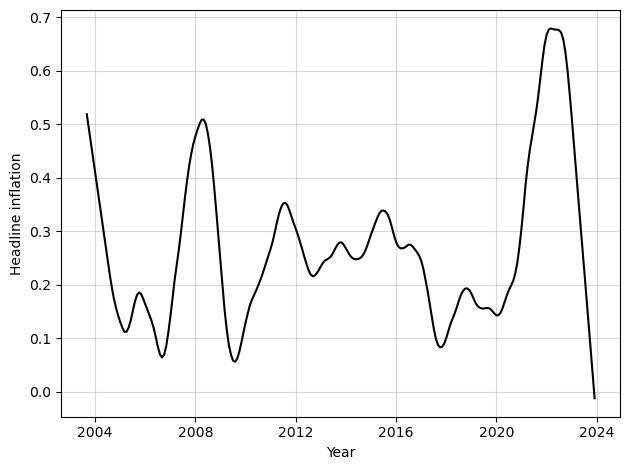

In [5]:
fig, ax = plt.subplots()

ax.plot(df.index, df.CPI, color='k')

ax.set_xlabel('Year')
ax.set_ylabel('Headline inflation')

ax.grid(alpha=0.5)

plt.tight_layout()

plt.savefig('../../../output/2_DataVisualization/plot_outcome.png')
plt.show()

### 2.3.2 Plotting our predictors

In [6]:
len(df.columns)

10

In [7]:
# We select our input variables: all except CPI
df_variables = df.loc[:, ['Monetary Policy Rate', 'Exchange rate',
       'Circulating Currency Seasonally Adjusted (mill S/)',
       'Net International Reserves (mill $)', 'Real Minimum Wage (Index)',
       'Wheat (US$ per ton)', 'Corn  (US$ per ton)', 
       'Soybean oil (US$ per ton)', 'Crude oil (US$ per barrel)']]

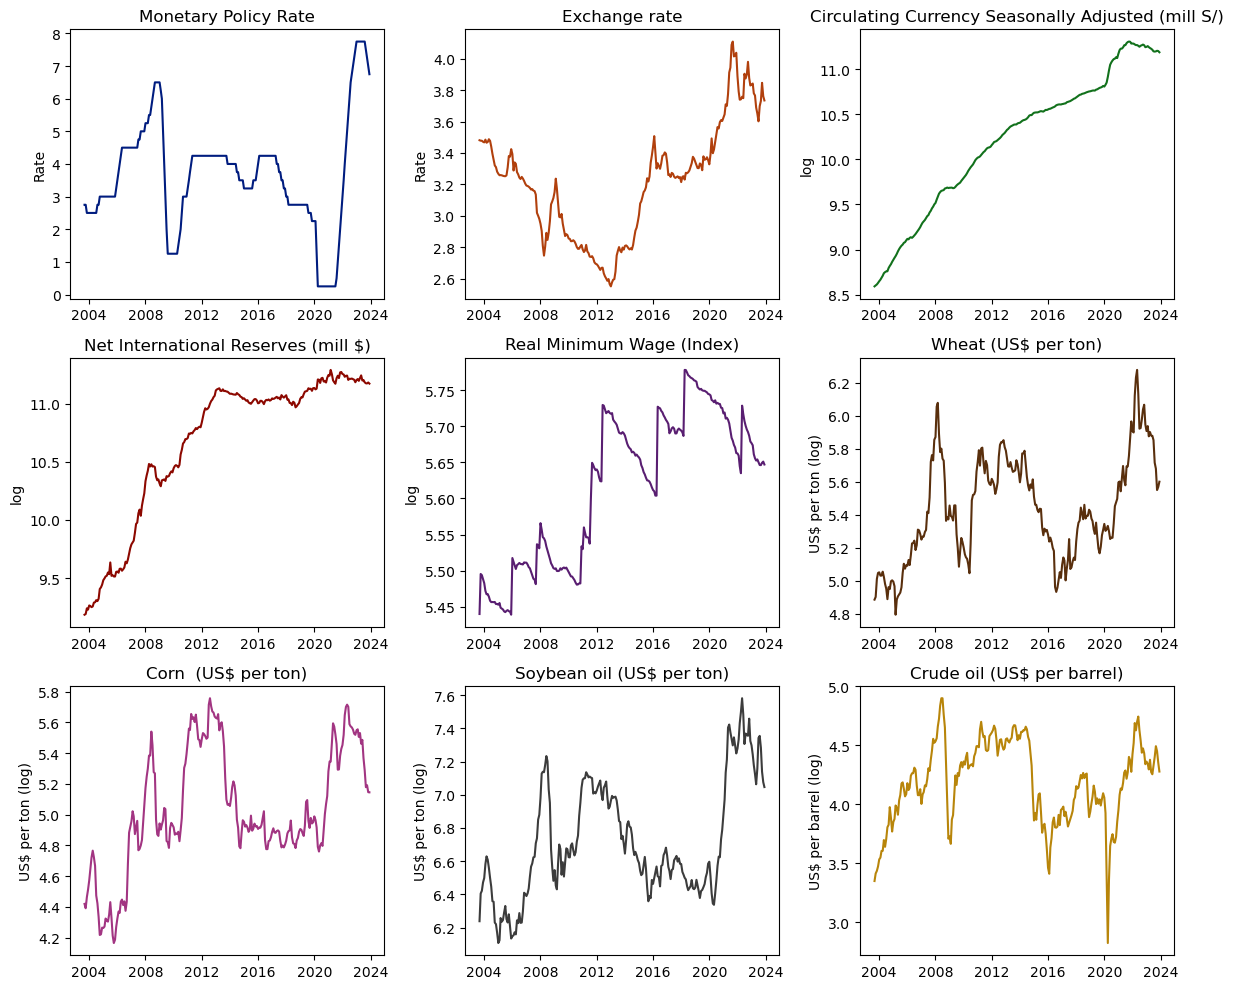

In [8]:
# Groups of variables
rate_columns = ["Reserve Requirement Rate", "Monetary Policy Rate", "Exchange rate"]
usd_per_ton_columns = ["Wheat (US$ per ton)", "Corn  (US$ per ton)", "Soybean oil (US$ per ton)"]
usd_per_barrel_columns = ["Crude oil (US$ per barrel)"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

columns = df_variables.columns

colors = sns.color_palette("dark", n_colors=len(columns))

# We iterate over the rows and columns for each plot
for i in range(3):
    for j in range(3):
        index = i * 3 + j
        if index <= len(columns):
            ax = axes[i, j]
            ax.plot(df.index, df[columns[index]], color=colors[index])
            ax.set_title(columns[index])
            if columns[index] in rate_columns:
                ax.set_ylabel('Rate')
            elif columns[index] in usd_per_ton_columns:
                ax.set_ylabel('US$ per ton (log)')
            elif columns[index] in usd_per_barrel_columns:
                ax.set_ylabel('US$ per barrel (log)')
            else:
                ax.set_ylabel('log')

plt.tight_layout()

plt.savefig('../../../output/2_DataVisualization/plot_variables_h19.png')
plt.show()

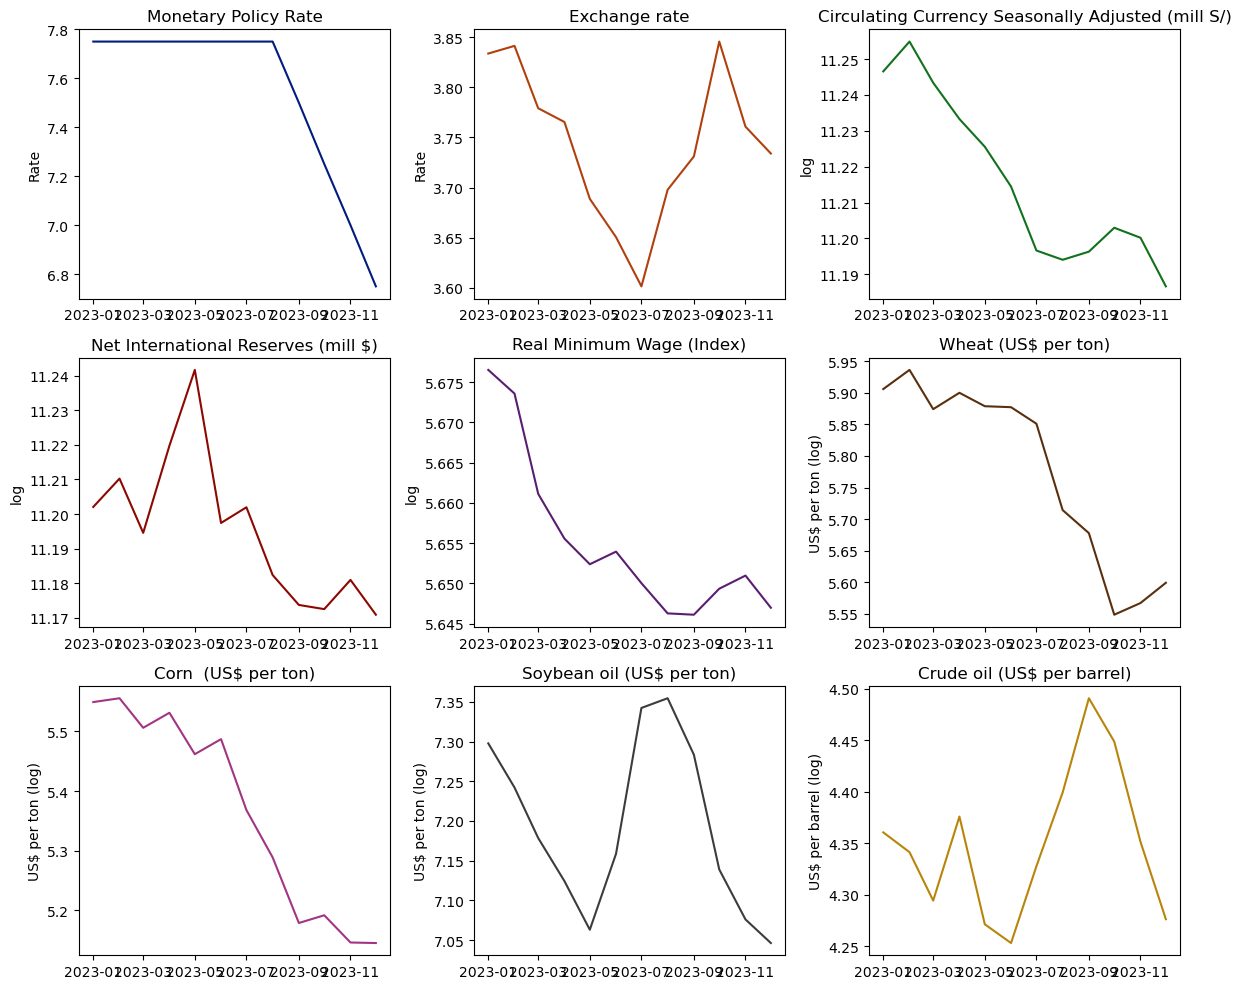

In [22]:
df_2 = df['2023-01-01':'2023-12-01']

# Groups of variables
rate_columns = ["Reserve Requirement Rate", "Monetary Policy Rate", "Exchange rate"]
usd_per_ton_columns = ["Wheat (US$ per ton)", "Corn  (US$ per ton)", "Soybean oil (US$ per ton)"]
usd_per_barrel_columns = ["Crude oil (US$ per barrel)"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

columns = df_variables.columns

colors = sns.color_palette("dark", n_colors=len(columns))

# We iterate over the rows and columns for each plot
for i in range(3):
    for j in range(3):
        index = i * 3 + j
        if index <= len(columns):
            ax = axes[i, j]
            ax.plot(df_2.index, df_2[columns[index]], color=colors[index])
            ax.set_title(columns[index])
            if columns[index] in rate_columns:
                ax.set_ylabel('Rate')
            elif columns[index] in usd_per_ton_columns:
                ax.set_ylabel('US$ per ton (log)')
            elif columns[index] in usd_per_barrel_columns:
                ax.set_ylabel('US$ per barrel (log)')
            else:
                ax.set_ylabel('log')

plt.tight_layout()

plt.show()

## 2.4 Getting correlations

First, we obtain the correlations between the Consumer Price Index (IPC) and all the variables

In [10]:
corr = df.corr()['CPI']
pd.DataFrame(corr)

,CPI
CPI,1.000000
Monetary Policy Rate,0.835116
Exchange rate,0.901797
Circulating Currency Seasonally Adjusted (mill S/),0.933709
Net International Reserves (mill $),0.007539
Real Minimum Wage (Index),-0.967145
Wheat (US$ per ton),0.826216
Corn (US$ per ton),0.076579
Soybean oil (US$ per ton),0.673051
Crude oil (US$ per barrel),0.895836


Then, we obtain the correlations between the Core Consumer Price Index (IPC Alimentos y Energía) and all the variables

## 2.5 Visualizing correlations

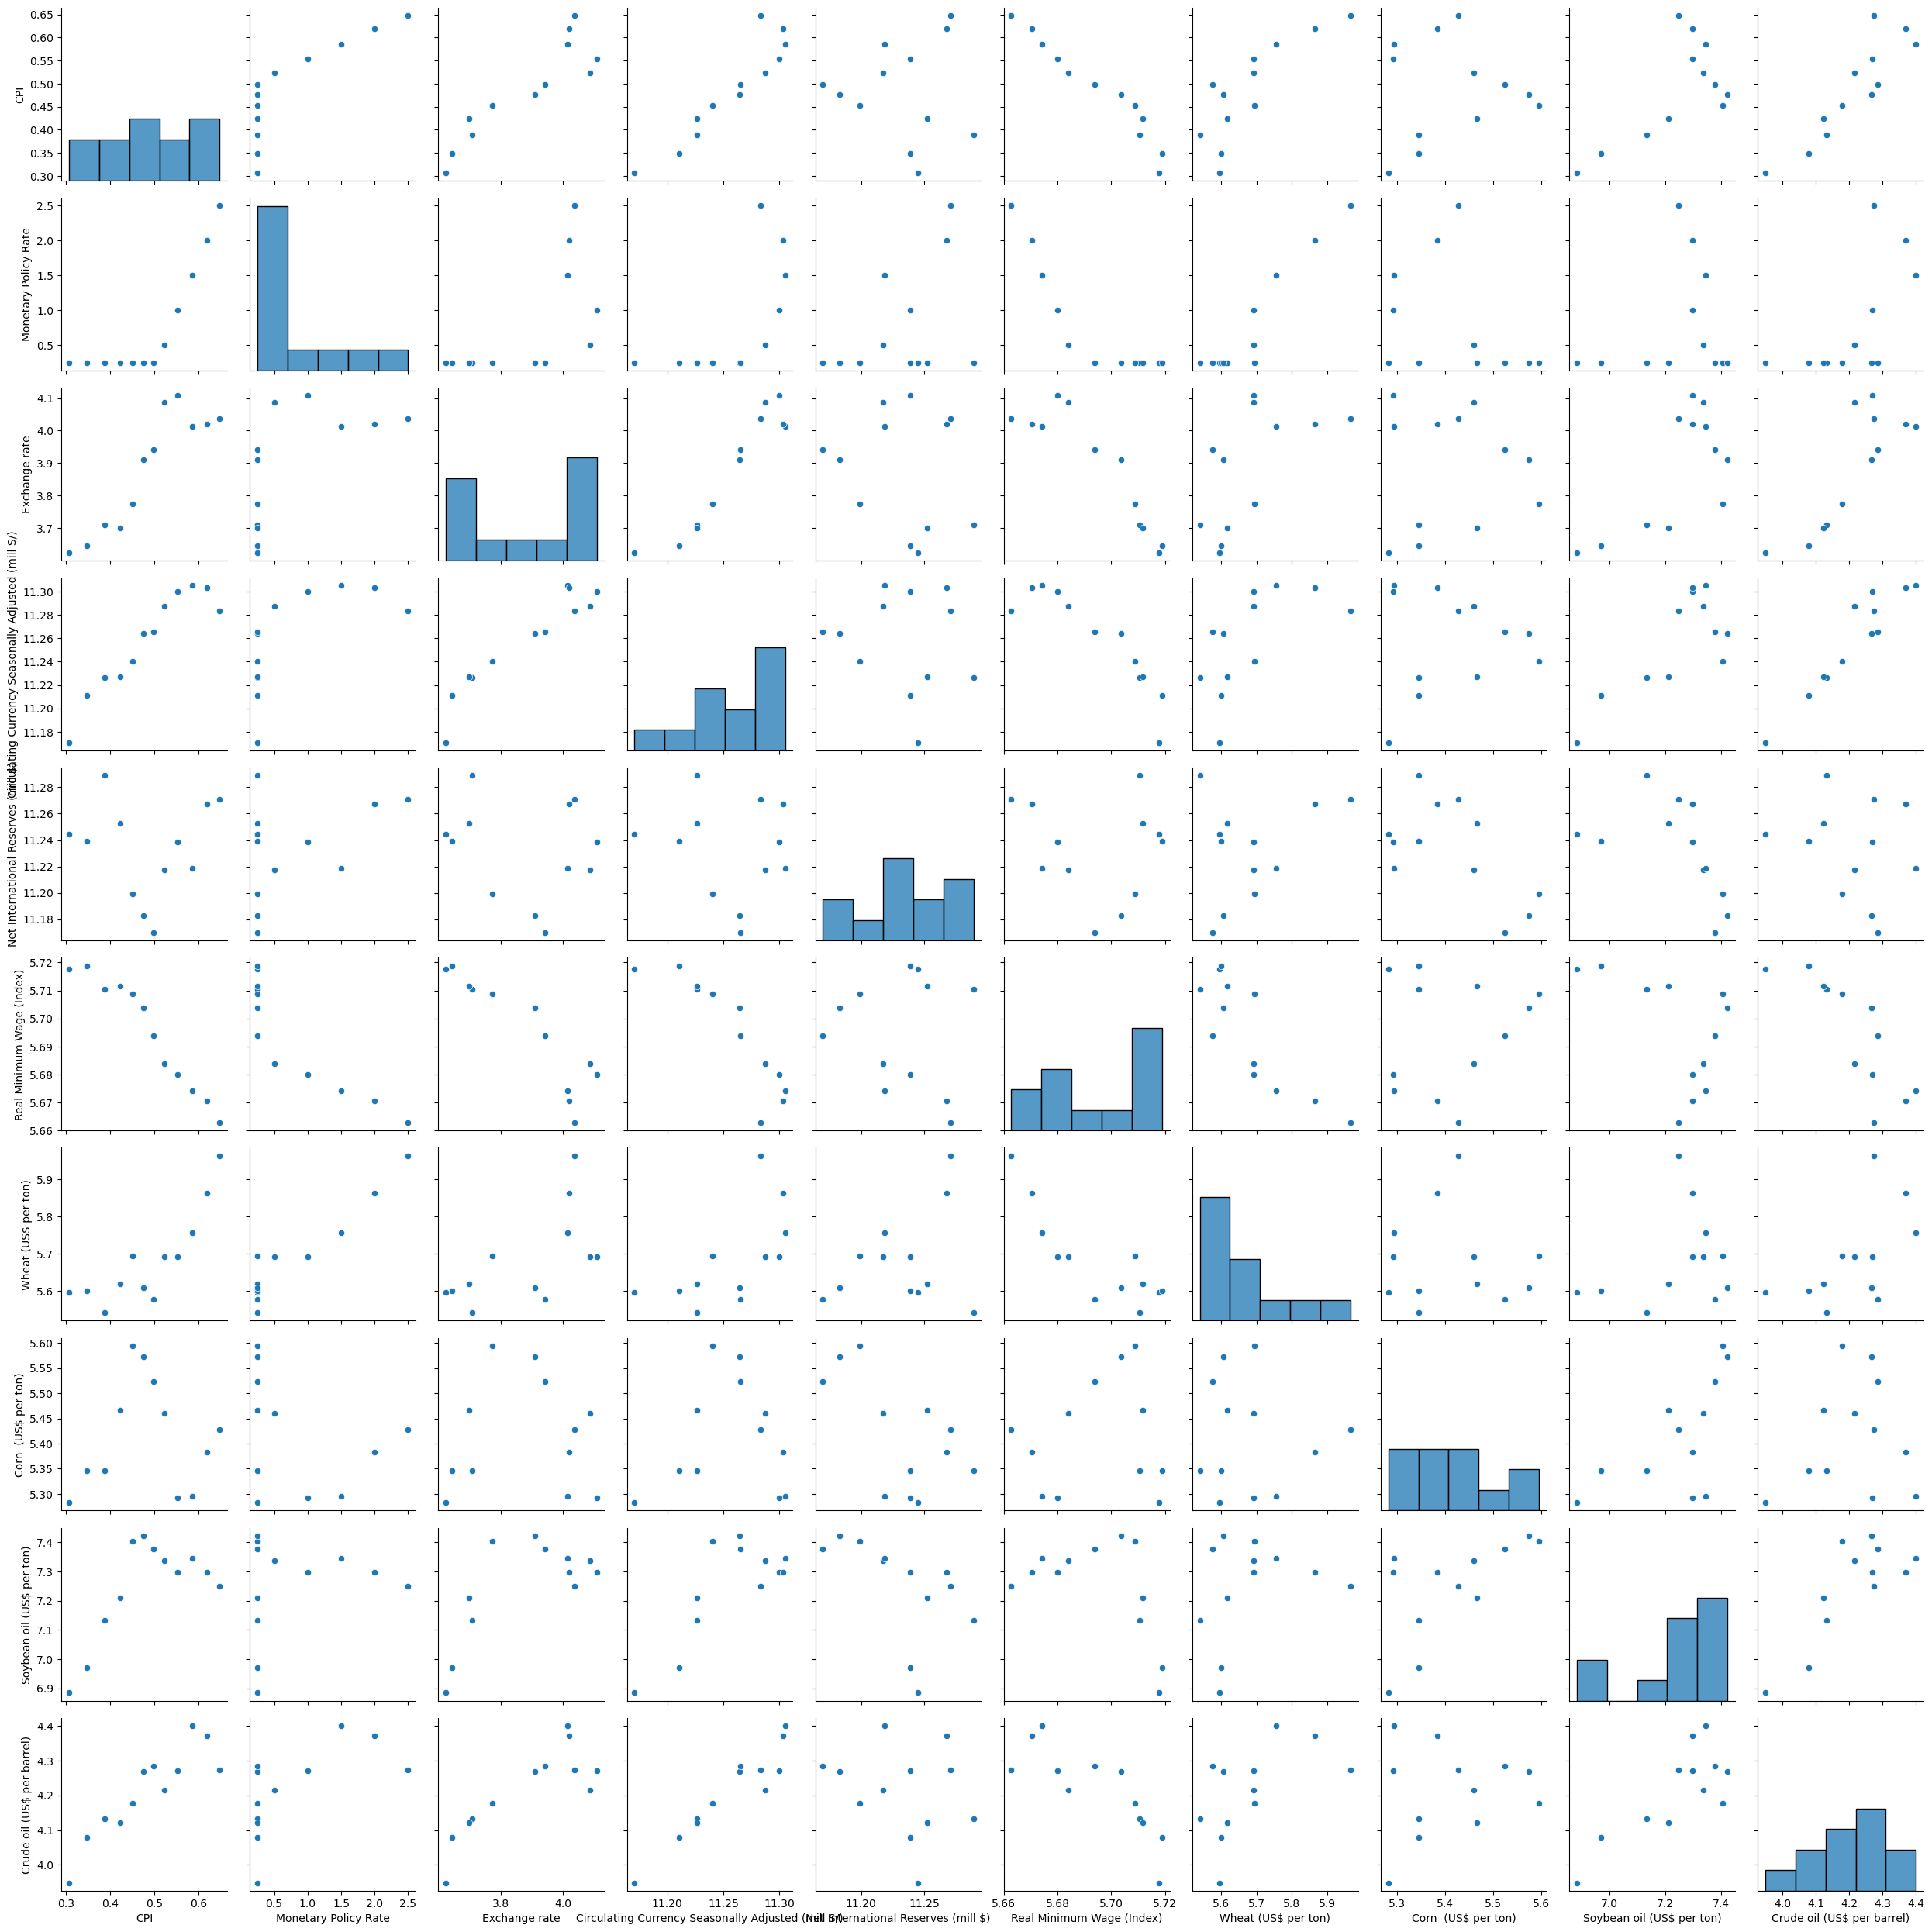

In [11]:
sns.pairplot(df)
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/2_DataVisualization/pairplot_test.png')

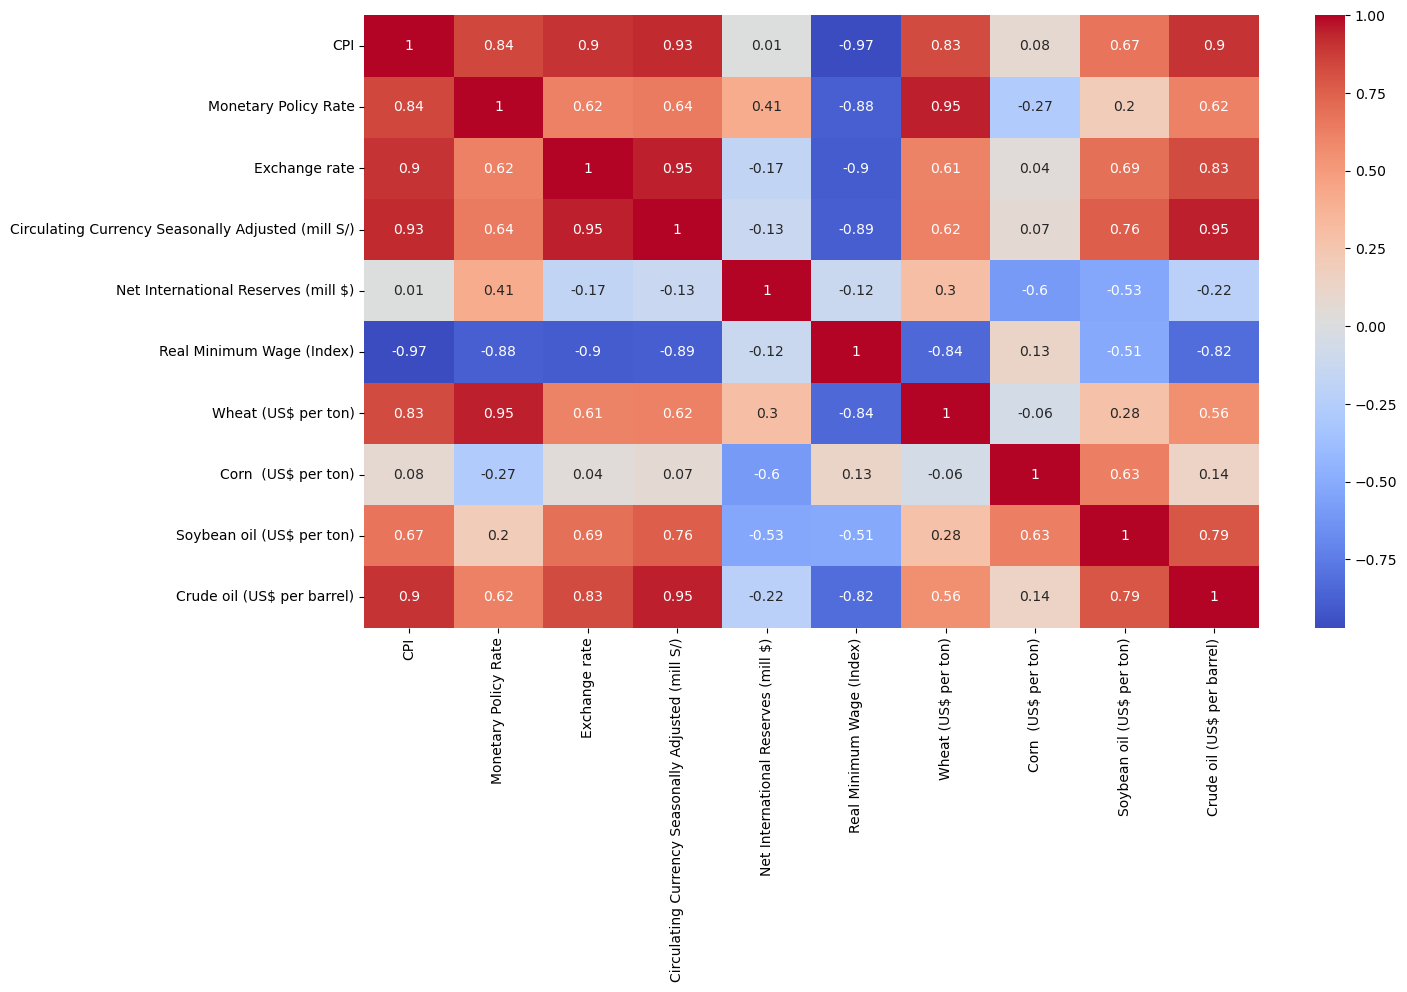

In [12]:
corr = df.corr().round(2)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/2_DataVisualization/heatmap_test.png')

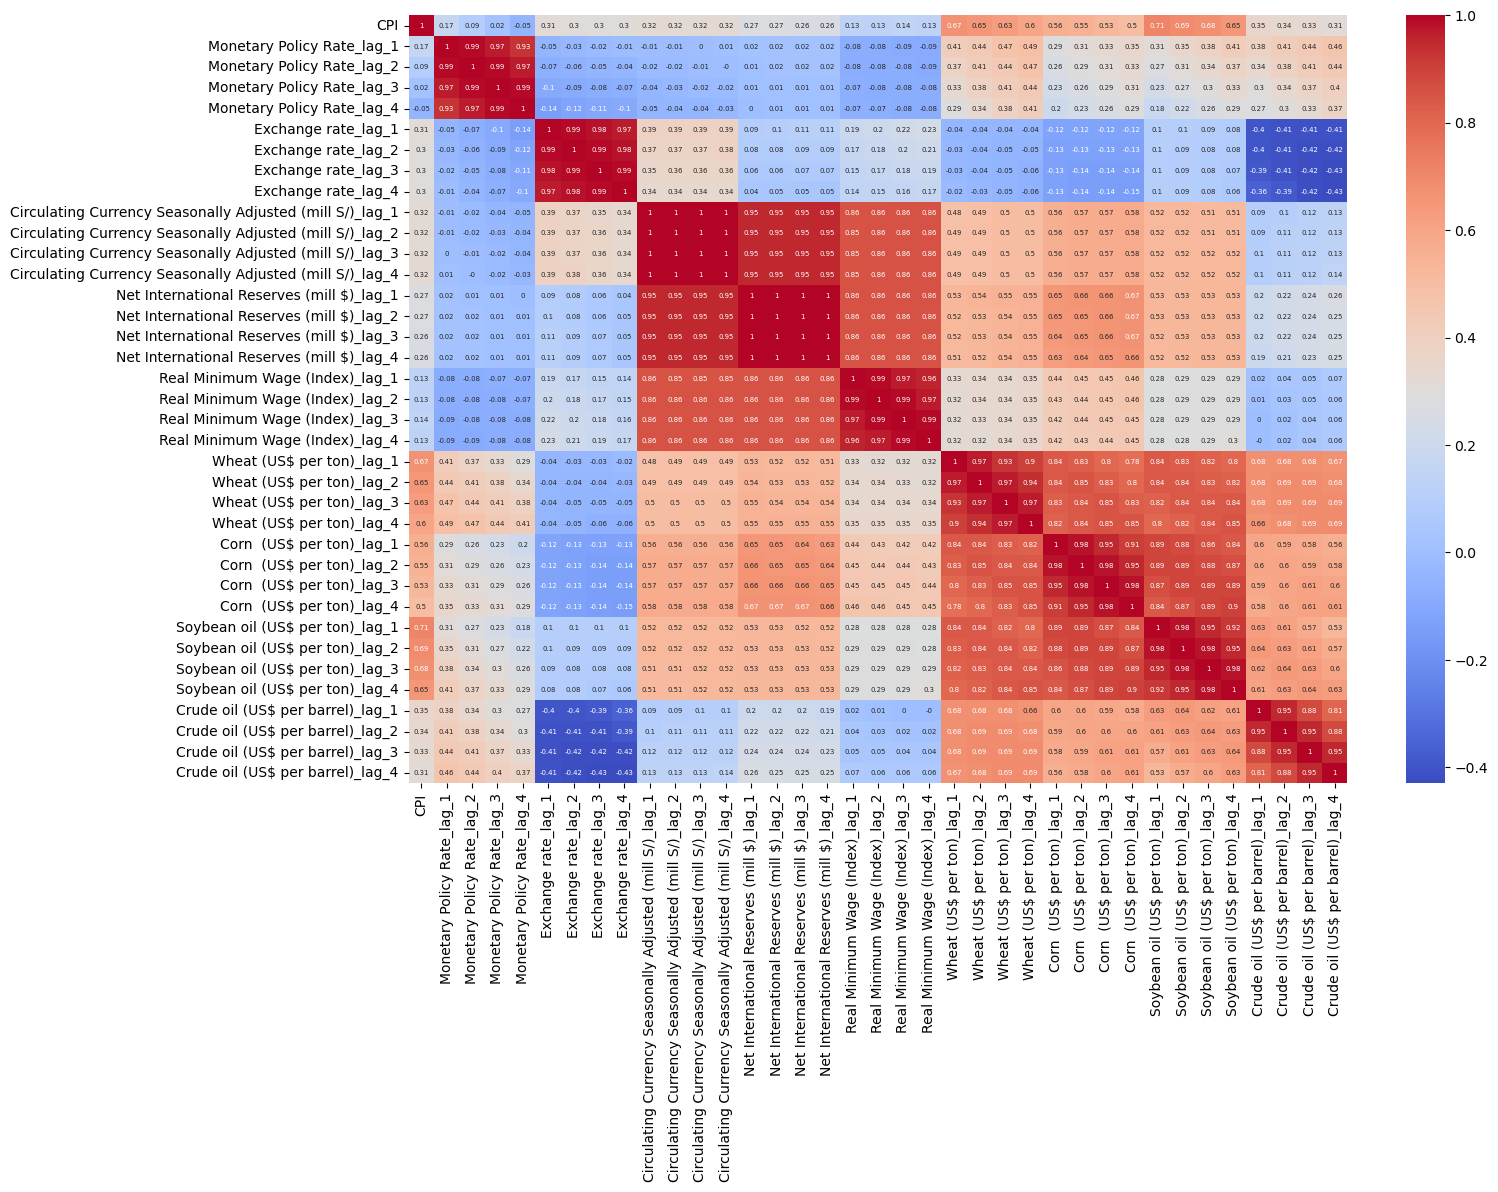

In [13]:
corr = df_lags.corr().round(2)
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 5})
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/2_DataVisualization/heatmap_lags_test.png')